In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv


# **Global Cybersecurity Threats (2015-2024) Dataset EDA**

![](http:www.zdnet.com/a/img/resize/438fb630b4e3926c9bd26eaef633fec2e110810e/2020/02/21/ed8fd91f-6a8c-4099-b2ab-a88ad781f42d/istock-1097676716.jpg?width=770&height=578&fit=crop&auto=webp)

# About Dataset

The Global Cybersecurity Threats Dataset (2015-2024) provides extensive data on cyberattacks, malware types, targeted industries, and affected countries. It is designed for threat intelligence analysis, cybersecurity trend forecasting, and machine learning model development to enhance global digital security.

# Data Loading and Exploration

## Load CSV file and create a dataframe

In [2]:
df=pd.read_csv("/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv")

## Understanding the data

In [3]:
print(df.shape)
print("---"*30)
print(df.info())
print("---"*30)
print(df.describe)
print("---"*30)

(3000, 10)
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  

## Checking missing values

In [4]:
print(df.isnull().sum())
print("---"*30)
df.columns=df.columns.str.strip()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64
------------------------------------------------------------------------------------------


## Checking duplicate values

In [5]:
print(df.nunique())
print("---"*30)
print("Duplicated values: ",df.duplicated().sum())
print("---"*30)

Country                                  10
Year                                     10
Attack Type                               6
Target Industry                           7
Financial Loss (in Million $)          2536
Number of Affected Users               2998
Attack Source                             4
Security Vulnerability Type               4
Defense Mechanism Used                    5
Incident Resolution Time (in Hours)      72
dtype: int64
------------------------------------------------------------------------------------------
Duplicated values:  0
------------------------------------------------------------------------------------------


# VISUALIZATION

## Countplot

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Phishing'),
  Text(1, 0, 'Ransomware'),
  Text(2, 0, 'Man-in-the-Middle'),
  Text(3, 0, 'DDoS'),
  Text(4, 0, 'SQL Injection'),
  Text(5, 0, 'Malware')])

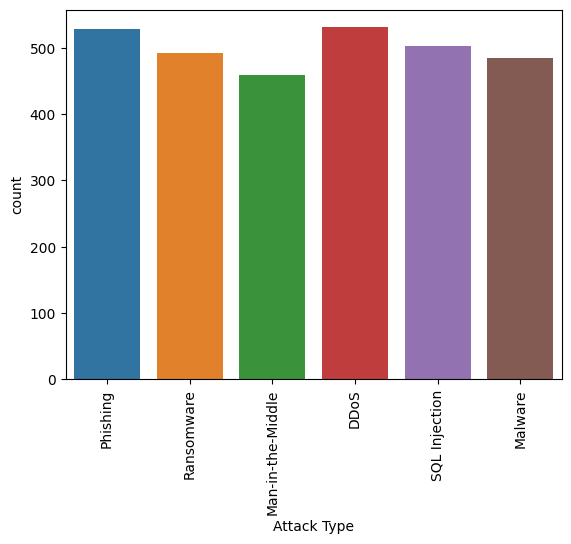

In [6]:
sns.countplot(data=df,x='Attack Type')
plt.xticks(rotation=90)

## Bargraph

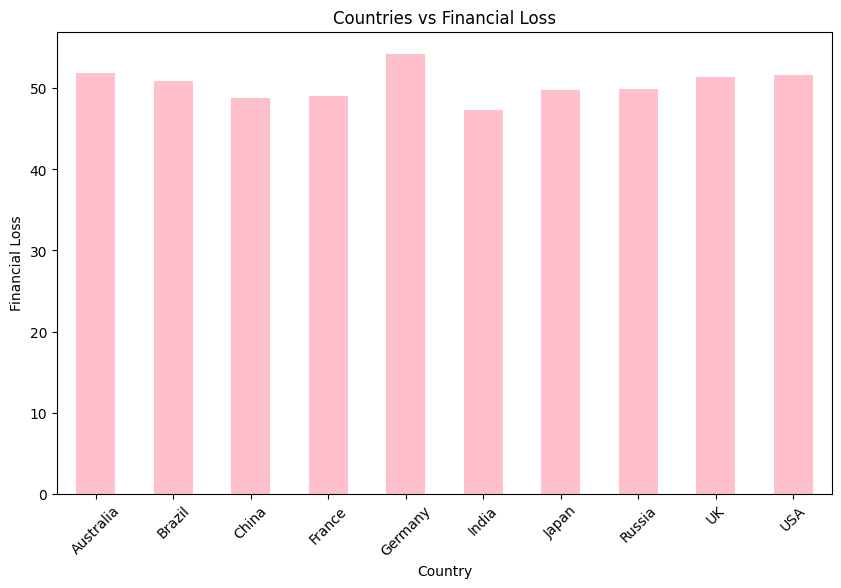

In [7]:
avg_value=df.groupby('Country')['Financial Loss (in Million $)'].mean()
avg_value.plot(kind='bar',x='Country',y='Financial Loss (in Million $)',figsize=(10,6),color='pink')
plt.title('Countries vs Financial Loss')
plt.xlabel('Country')
plt.ylabel('Financial Loss')
plt.xticks(rotation=45)
plt.show()

### The bar chart shows that Germany has faced the largest financial loss among all the other countries.

## PieChart

Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64


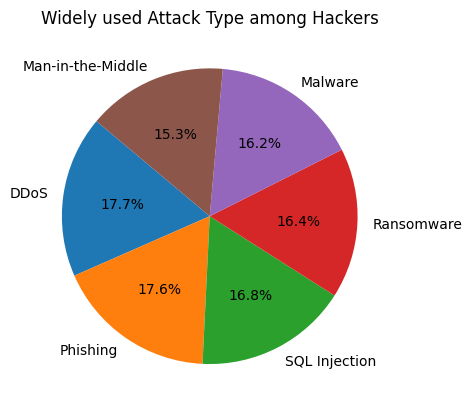

In [8]:
avg_attack=df['Attack Type'].value_counts()
print(avg_attack)
plt.pie(avg_attack.values, labels=avg_attack.index, autopct='%1.1f%%', startangle=140)
plt.title('Widely used Attack Type among Hackers')
plt.show()

### From the pie chart, the widely used attack type among users is Phishing.

*Notebook by Jayastri Nivedha*
## ***ThankYou***